In [1]:
import os
import glob
import dqva
import random
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.quantum_info import Statevector

from utils.graph_funcs import *
from utils.helper_funcs import *

from ansatz import qaoa, qv_ansatz, dqv_ansatz, dqv_cut_ansatz

In [2]:
test_graphs = glob.glob('benchmark_graphs/N8_p20_graphs/*')
test_graphs = sorted(test_graphs, key=lambda g: int(g.split('/')[-1].strip('G.txt')))
print(len(test_graphs))

50


benchmark_graphs/N8_p20_graphs/G1.txt
Optimal: ('01011001', 4)


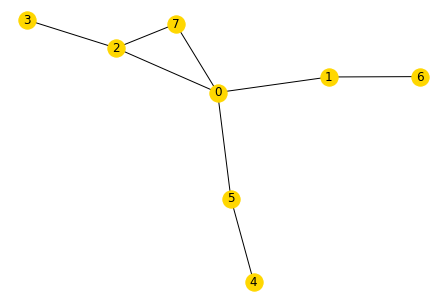

In [3]:
graph = test_graphs[0]
print(graph)
G = graph_from_file(graph)
print('Optimal:', brute_force_search(G))
nx.draw_spring(G, with_labels=True, node_color='gold')

# Test ansatz generation

In [6]:
nq = len(G.nodes())
P = 2
params = list(range(1, 2*P + 1))
mixer_order = list(range(nq))
#random.shuffle(mixer_order)
circ = qaoa.gen_qaoa(G, P, params=params, init_state='0'*nq, barriers=2,
                     decompose_toffoli=1, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

betas: [1, 3]
gammas: [2, 4]
Mixer order: [0, 1, 2, 3, 4, 5, 6, 7]
qubit: 0 num_qubits = 9 neighbors: [1, 2, 5, 7]
qubit: 1 num_qubits = 9 neighbors: [0, 6]
qubit: 2 num_qubits = 9 neighbors: [0, 3, 7]
qubit: 3 num_qubits = 9 neighbors: [2]
qubit: 4 num_qubits = 9 neighbors: [5]
qubit: 5 num_qubits = 9 neighbors: [0, 4]
qubit: 6 num_qubits = 9 neighbors: [1]
qubit: 7 num_qubits = 9 neighbors: [0, 2]
Mixer order: [0, 1, 2, 3, 4, 5, 6, 7]
qubit: 0 num_qubits = 9 neighbors: [1, 2, 5, 7]
qubit: 1 num_qubits = 9 neighbors: [0, 6]
qubit: 2 num_qubits = 9 neighbors: [0, 3, 7]
qubit: 3 num_qubits = 9 neighbors: [2]
qubit: 4 num_qubits = 9 neighbors: [5]
qubit: 5 num_qubits = 9 neighbors: [0, 4]
qubit: 6 num_qubits = 9 neighbors: [1]
qubit: 7 num_qubits = 9 neighbors: [0, 2]


░                ┌───────┐                ░ ┌───┐     ┌───┐  ┌───┐            ┌───┐ ░ ┌───┐     ┌───┐  ┌───┐            ┌───┐ ░                                    ░                                         ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░                                    ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░  ░ ┌───────┐ ░                ┌───────┐                ░ ┌───┐     ┌───┐  ┌───┐            ┌───┐ ░ ┌───┐     ┌───┐  ┌───┐            ┌───┐ ░                                    ░                                         ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░                                    ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░  ░ ┌───────┐ ░ 
  q_0: ─░────────────────┤ RX(2) ├────────────────░─┤ X ├──■──┤ X ├──┤ X ├─────────■──┤ X ├─░─┤ X ├──■──┤ X ├──┤ X ├─────────■──┤ X ├─░────────────────────────────────────░─────────────────────────────────────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░────────────────────────────────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░──░─┤ RZ(4) ├─░────────────────┤ RX(6) ├────────────────░─┤ X ├──■──┤ X ├──┤ X ├─────────■──┤ X ├─░─┤ X ├──■──┤ X ├──┤ X ├─────────■──┤ X ├─░────────────────────────────────────░─────────────────────────────────────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░────────────────────────────────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░──░─┤ RZ(8) ├─░─
        ░ ┌───┐     ┌───┐└───┬───┘┌───┐     ┌───┐ ░ └───┘  │  └───┘┌─┴───┴─┐       │  └───┘ ░ └───┘  │  └───┘  └───┘         │  └───┘ ░                                    ░                                         ░ └───┘  │    └───┘  └───┘  │  └───┘ ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░ └───┘  │    └───┘  └───┘  │  └───┘ ░  ░ ├───────┤ ░ ┌───┐     ┌───┐└───┬───┘┌───┐     ┌───┐ ░ └───┘  │  └───┘┌─┴───┴─┐       │  └───┘ ░ └───┘  │  └───┘  └───┘         │  └───┘ ░                                    ░                                         ░ └───┘  │    └───┘  └───┘  │  └───┘ ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░ └───┘  │    └───┘  └───┘  │  └───┘ ░  ░ ├───────┤ ░ 
  q_1: ─░─┤ X ├──■──┤ X ├────┼────┤ X ├──■──┤ X ├─░────────┼───────┤ RX(2) ├───────┼────────░────────┼───────────────────────┼────────░────────────────────────────────────░─────────────────────────────────────────░────────┼──────────────────┼────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░────────┼──────────────────┼────────░──░─┤ RZ(4) ├─░─┤ X ├──■──┤ X ├────┼────┤ X ├──■──┤ X ├─░────────┼───────┤ RX(6) ├───────┼────────░────────┼───────────────────────┼────────░────────────────────────────────────░─────────────────────────────────────────░────────┼──────────────────┼────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░────────┼──────────────────┼────────░──░─┤ RZ(8) ├─░─
        ░ ├───┤  │  ├───┤    │    ├───┤  │  ├───┤ ░        │       └───┬───┘       │        ░        │       ┌───────┐       │        ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░                                         ░        │                  │        ░ └───┘  │    └───┘  └───┘  │  └───┘ ░ ┌───┐  │    ┌───┐  ┌───┐  │  ┌───┐ ░  ░ ├───────┤ ░ ├───┤  │  ├───┤    │    ├───┤  │  ├───┤ ░        │       └───┬───┘       │        ░        │       ┌───────┐       │        ░ ┌───┐       ┌───┐  ┌───┐     ┌───┐ ░                                         ░        │                  │        ░ └───┘  │    └───┘  └───┘  │  └───┘ ░ ┌───┐  │    ┌───┐  ┌───┐  │  ┌───┐ ░  ░ ├───────┤ ░ 
  q_2: ─░─┤ X ├──■──┤ X ├────┼────┤ X ├──■──┤ X ├─░────────┼───────────┼───────────┼────────░────────┼───────┤ RX(2) ├───────┼────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░─────────────────────────────────────────░────────┼──────────────────┼────────░────────┼──────────────────┼────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░──░─┤ RZ(4) ├─░─┤ X ├──■──┤ X ├────┼────┤ X ├──■──┤ X ├─░────────┼───────────┼───────────┼────────░────────┼───────┤ RX(6) ├───────┼────────░─┤ X ├──■────┤ X ├──┤ X ├──■──┤ X ├─░─────────────────────────────────────────░────────┼──────────────────┼────────░────────┼──────────────────┼────────░─┤ X ├──■────┤ X ├──┤ X 

In [15]:
nq = len(G.nodes())
P = 2
params = list(range(1, P*(nq + 1) + 1))
mixer_order = list(range(nq))
random.shuffle(mixer_order)
circ = qv_ansatz.gen_qv_ansatz(G, P=P, params=params, init_state='0'*nq, barriers=2,
                               decompose_toffoli=0, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

alpha_0: [1, 2, 3, 4, 5, 6]
gamma_0: 7
alpha_1: [8, 9, 10, 11, 12, 13]
gamma_1: 14
Mixer order: [5, 0, 3, 1, 4, 2]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]
Mixer order: [5, 0, 3, 1, 4, 2]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]


░                      ░      ┌───────┐      ░                     ░                     ░                      ░                     ░  ░ ┌────────┐ ░                      ░      ┌────────┐      ░                      ░                      ░                      ░                      ░  ░ ┌────────┐ ░ 
  q_0: ─░──────────────────────░──────┤ RX(2) ├──────░───o─────────────o───░───o─────────────o───░───o──────────────o───░─────────────────────░──░─┤ RZ(14) ├─░──────────────────────░──────┤ RX(16) ├──────░───o──────────────o───░───o──────────────o───░───o──────────────o───░──────────────────────░──░─┤ RZ(28) ├─░─
        ░                      ░      └───┬───┘      ░   │             │   ░   │  ┌───────┐  │   ░   │              │   ░                     ░  ░ ├────────┤ ░                      ░      └───┬────┘      ░   │              │   ░   │  ┌────────┐  │   ░   │              │   ░                      ░  ░ ├────────┤ ░ 
  q_1: ─░───o──────────────o───░───o──────┼──────o───░───┼─────────────┼───░───┼──┤ RX(4) ├──┼───░───┼──────────────┼───░───o─────────────o───░──░─┤ RZ(14) ├─░───o──────────────o───░───o──────┼───────o───░───┼──────────────┼───░───┼──┤ RX(18) ├──┼───░───┼──────────────┼───░───o──────────────o───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │             │   ░   │  └───┬───┘  │   ░   │              │   ░   │  ┌───────┐  │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │              │   ░   │  └───┬────┘  │   ░   │              │   ░   │  ┌────────┐  │   ░  ░ ├────────┤ ░ 
  q_2: ─░───o──────────────o───░───┼──────┼──────┼───░───o─────────────o───░───o──────┼──────o───░───┼──────────────┼───░───┼──┤ RX(6) ├──┼───░──░─┤ RZ(14) ├─░───o──────────────o───░───┼──────┼───────┼───░───o──────────────o───░───o──────┼───────o───░───┼──────────────┼───░───┼──┤ RX(20) ├──┼───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │  ┌───────┐  │   ░   │      │      │   ░   │              │   ░   │  └───┬───┘  │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │  ┌────────┐  │   ░   │      │       │   ░   │              │   ░   │  └───┬────┘  │   ░  ░ ├────────┤ ░ 
  q_3: ─░───┼──────────────┼───░───o──────┼──────o───░───┼──┤ RX(8) ├──┼───░───┼──────┼──────┼───░───o──────────────o───░───o──────┼──────o───░──░─┤ RZ(14) ├─░───┼──────────────┼───░───o──────┼───────o───░───┼──┤ RX(22) ├──┼───░───┼──────┼───────┼───░───o──────────────o───░───o──────┼───────o───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │  └───┬───┘  │   ░   │      │      │   ░   │  ┌────────┐  │   ░   │      │      │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │  └───┬────┘  │   ░   │      │       │   ░   │  ┌────────┐  │   ░   │      │       │   ░  ░ ├────────┤ ░ 
  q_4: ─░───o──────────────o───░───o──────┼──────o───░───o──────┼──────o───░───┼──────┼──────┼───░───┼──┤ RX(10) ├──┼───░───┼──────┼──────┼───░──░─┤ RZ(14) ├─░───o──────────────o───░───o──────┼───────o───░───o──────┼───────o───░───┼──────┼───────┼───░───┼──┤ RX(24) ├──┼───░───┼──────┼───────┼───░──░─┤ RZ(28) ├─░─
        ░   │  ┌────────┐  │   ░   │      │      │   ░   │      │      │   ░   │      │      │   ░   │  └───┬────┘  │   ░   │      │      │   ░  ░ ├────────┤ ░   │  ┌────────┐  │   ░   │      │       │   ░   │      │       │   ░   │      │       │   ░   │  └───┬────┘  │   ░   │      │       │   ░  ░ ├────────┤ ░ 
  q_5: ─░───┼──┤ RX(12) ├──┼───░───┼──────┼──────┼───░───┼──────┼──────┼───░───o──────┼──────o───░───o──────┼───────o───░───o──────┼──────o───░──░─┤ RZ(14) ├─░───┼──┤ RX(26) ├──┼───░───┼──────┼───────┼───░───┼──────┼───────┼───░───o──────┼───────o───░───o──────┼───────o───░───o──────┼───────o───░──░─┤ RZ(28) ├─░─
        ░ ┌─┴─┐└───┬────┘┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░  ░ └────────┘ ░ ┌─┴─┐└───┬────┘┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░

In [4]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)

init_state = '00011111'
num_nonzero = nq - hamming_weight(init_state)
print('lim1:', P * (nq + 1))
print('lim2:', (P+1) * (num_nonzero + 1))
param_lim = 8
if param_lim is None:
    num_params = min(P * (nq + 1), (P+1) * (num_nonzero + 1))
else:
    num_params = param_lim
params = list(range(1, num_params + 1))
print(params)

circ = dqv_ansatz.gen_dqva(G, P=P, params=params, init_state=init_state, barriers=1,
                           decompose_toffoli=0, mixer_order=mixer_order, verbose=1, param_lim=param_lim)
circ.draw(fold=-1)

lim1: 9
lim2: 8
[1, 2, 3, 4, 5, 6, 7, 8]
alpha_0: [2, 3, 4]
gamma_0: 1
alpha_1: [5, 6, 7]
gamma_1: 8
init_state: 00011111, alpha: [2, 3, 4], pad_alpha: [None, None, None, None, None, 4, 3, 2]
Mixer order: [3, 4, 1, 0, 7, 6, 2, 5]
qubit: 7 num_qubits = 9 neighbors: [0, 2]
qubit: 6 num_qubits = 9 neighbors: [1]
qubit: 5 num_qubits = 9 neighbors: [0, 4]
init_state: 00011111, alpha: [5, 6, 7], pad_alpha: [None, None, None, None, None, 7, 6, 5]
Mixer order: [3, 4, 1, 0, 7, 6, 2, 5]
qubit: 7 num_qubits = 9 neighbors: [0, 2]
qubit: 6 num_qubits = 9 neighbors: [1]
qubit: 5 num_qubits = 9 neighbors: [0, 4]


┌───┐ ░                                                           ░ ┌───────┐ ░                                                              ░ ┌────────┐ ░ 
  q_0: ┤ X ├─░───o─────────────o───────────────────────o─────────────o───░─┤ RZ(2) ├─░───o──────────────o────────────────────────o──────────────o───░─┤ RZ(16) ├─░─
       ├───┤ ░   │             │                       │             │   ░ ├───────┤ ░   │              │                        │              │   ░ ├────────┤ ░ 
  q_1: ┤ X ├─░───┼─────────────┼────o─────────────o────┼─────────────┼───░─┤ RZ(2) ├─░───┼──────────────┼────o──────────────o────┼──────────────┼───░─┤ RZ(16) ├─░─
       ├───┤ ░   │             │    │             │    │             │   ░ ├───────┤ ░   │              │    │              │    │              │   ░ ├────────┤ ░ 
  q_2: ┤ X ├─░───o─────────────o────┼─────────────┼────┼─────────────┼───░─┤ RZ(2) ├─░───o──────────────o────┼──────────────┼────┼──────────────┼───░─┤ RZ(16) ├─░─
       ├───┤ ░   │             │    │             │    │             │   ░ ├───────┤ ░   │              │    │              │    │              │   ░ ├────────┤ ░ 
  q_3: ┤ X ├─░───┼─────────────┼────┼─────────────┼────┼─────────────┼───░─┤ RZ(2) ├─░───┼──────────────┼────┼──────────────┼────┼──────────────┼───░─┤ RZ(16) ├─░─
       ├───┤ ░   │             │    │             │    │             │   ░ ├───────┤ ░   │              │    │              │    │              │   ░ ├────────┤ ░ 
  q_4: ┤ X ├─░───┼─────────────┼────┼─────────────┼────o─────────────o───░─┤ RZ(2) ├─░───┼──────────────┼────┼──────────────┼────o──────────────o───░─┤ RZ(16) ├─░─
       └───┘ ░   │             │    │             │    │  ┌───────┐  │   ░ ├───────┤ ░   │              │    │              │    │  ┌────────┐  │   ░ ├────────┤ ░ 
  q_5: ──────░───┼─────────────┼────┼─────────────┼────┼──┤ RX(8) ├──┼───░─┤ RZ(2) ├─░───┼──────────────┼────┼──────────────┼────┼──┤ RX(14) ├──┼───░─┤ RZ(16) ├─░─
             ░   │             │    │  ┌───────┐  │    │  └───┬───┘  │   ░ ├───────┤ ░   │              │    │  ┌────────┐  │    │  └───┬────┘  │   ░ ├────────┤ ░ 
  q_6: ──────░───┼─────────────┼────┼──┤ RX(6) ├──┼────┼──────┼──────┼───░─┤ RZ(2) ├─░───┼──────────────┼────┼──┤ RX(12) ├──┼────┼──────┼───────┼───░─┤ RZ(16) ├─░─
             ░   │  ┌───────┐  │    │  └───┬───┘  │    │      │      │   ░ ├───────┤ ░   │  ┌────────┐  │    │  └───┬────┘  │    │      │       │   ░ ├────────┤ ░ 
  q_7: ──────░───┼──┤ RX(4) ├──┼────┼──────┼──────┼────┼──────┼──────┼───░─┤ RZ(2) ├─░───┼──┤ RX(10) ├──┼────┼──────┼───────┼────┼──────┼───────┼───░─┤ RZ(16) ├─░─
             ░ ┌─┴─┐└───┬───┘┌─┴─┐┌─┴─┐    │    ┌─┴─┐┌─┴─┐    │    ┌─┴─┐ ░ └───────┘ ░ ┌─┴─┐└───┬────┘┌─┴─┐┌─┴─┐    │     ┌─┴─┐┌─┴─┐    │     ┌─┴─┐ ░ └────────┘ ░ 
anc_0: ──────░─┤ X ├────■────┤ X ├┤ X ├────■────┤ X ├┤ X ├────■────┤ X ├─░───────────░─┤ X ├────■─────┤ X ├┤ X ├────■─────┤ X ├┤ X ├────■─────┤ X ├─░────────────░─
             ░ └───┘         └───┘└───┘         └───┘└───┘         └───┘ ░           ░ └───┘          └───┘└───┘          └───┘└───┘          └───┘ ░            ░

In [38]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)

init_state = '101111'
num_nonzero = nq - hamming_weight(init_state)
print('lim1:', P * (nq + 1))
print('lim2:', (P+1) * (num_nonzero + 1))
num_params = min(P * (nq + 1), (P+1) * (num_nonzero + 1))
params = list(range(1, num_params + 1))
print(params)

circ = dqv_cut_ansatz.gen_cut_dqva(G, P=P, params=params, init_state=init_state, barriers=1,
                           decompose_toffoli=0, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

lim1: 9
lim2: 8
[1, 2, 3, 4, 5, 6, 7, 8]


TypeError: gen_cut_dqva() missing 1 required positional argument: 'partition'

# Test each algorithm

In [5]:
nq = len(G.nodes())
P = 2
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'qasm'
shots = 10000
dqva.solve_mis_qaoa(init_state, G, P=P, m=3, mixer_order=mixer_order, sim=sim, shots=shots,
                    verbose=1)

Start round 1.1, Initial state = 000000
	Num params = 4
	Current Mixer Order: [2, 4, 1, 0, 3, 5]
	Optimal cost: -1.9995
	Found new independent set: 010100, Hamming weight = 2
Start round 1.2, Initial state = 010100
	Num params = 4
	Current Mixer Order: [2, 4, 1, 0, 3, 5]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
Start round 2.1, Initial state = 010100
	Num params = 4
	Current Mixer Order: [5, 1, 0, 4, 2, 3]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
Start round 3.1, Initial state = 010100
	Num params = 4
	Current Mixer Order: [3, 1, 0, 5, 4, 2]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
	RETURNING, best hamming weight: 2


('010100',
 array([ 1.75494824,  1.30805435, -0.03984568, -0.17136397]),
 '000000',
 [2, 4, 1, 0, 3, 5],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -1.9995,
    'init_state': '000000',
    'mixer_order': [2, 4, 1, 0, 3, 5]},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [2, 4, 1, 0, 3, 5]}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [5, 1, 0, 4, 2, 3]}],
  [{'mixer_round': 3,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [3, 1, 0, 5, 4, 2]}]])

In [5]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'statevector'
shots = 10000
dqva.solve_mis_qva(init_state, G, P=P, m=2, mixer_order=mixer_order, sim=sim, shots=shots,
                   verbose=1)

Start round 1.1, Initial state = 000000
	Num params = 7
	Current Mixer Order: [0, 1, 3, 5, 4, 2]
	Optimal cost: -2.00002
	Found new independent set: 100001, Hamming weight = 2
Start round 1.2, Initial state = 100001
	Num params = 7
	Current Mixer Order: [0, 1, 3, 5, 4, 2]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 100001
Start round 2.1, Initial state = 100001
	Num params = 7
	Current Mixer Order: [0, 1, 3, 2, 4, 5]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 100001
	RETURNING, best hamming weight: 2


('100001',
 array([ 1.5599838 ,  1.28540946,  1.5682869 ,  1.12516227,  1.12826922,
         1.29198086, -0.04768819]),
 '000000',
 [0, 1, 3, 5, 4, 2],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -2.00002,
    'init_state': '000000',
    'mixer_order': [0, 1, 3, 5, 4, 2]},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -2.0,
    'init_state': '100001',
    'mixer_order': [0, 1, 3, 5, 4, 2]}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '100001',
    'mixer_order': [0, 1, 3, 2, 4, 5]}]])

In [7]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'qasm'
shots = 10000
dqva.solve_mis_dqva(init_state, G, P=P, m=4, mixer_order=None, sim=sim, shots=shots,
                    verbose=1, param_lim=3)

Start round 1.1, Initial state = 00000000
	Num params = 3
	Current Mixer Order: [3, 6, 0, 4, 2, 1, 7, 5]
	Optimal cost: -1.9997
alpha_0: [1.5616227  1.58633983]
gamma_0: 0.012318006161935725
init_state: 00000000, alpha: [1.5616227  1.58633983], pad_alpha: [None, None, None, 1.561622702873652, None, None, 1.586339833201477, None]
Mixer order: [3, 6, 0, 4, 2, 1, 7, 5]
qubit: 3 num_qubits = 9 neighbors: [2]
qubit: 6 num_qubits = 9 neighbors: [1]
	Found new independent set: 01001000, Hamming weight = 2
Start round 1.2, Initial state = 01001000
	Num params = 3
	Current Mixer Order: [3, 6, 0, 4, 2, 1, 7, 5]
	Optimal cost: -3.9999000000000002
alpha_0: [1.57329645 1.56080976]
gamma_0: -0.020999934378899084
init_state: 01001000, alpha: [1.57329645 1.56080976], pad_alpha: [1.5732964489360834, None, None, None, 1.5608097552624143, None, None, None]
Mixer order: [3, 6, 0, 4, 2, 1, 7, 5]
qubit: 0 num_qubits = 9 neighbors: [1, 2, 5, 7]
qubit: 4 num_qubits = 9 neighbors: [5]
	Found new independent se

('01011001',
 array([-0.02099993,  1.57329645,  1.56080976]),
 '01001000',
 [3, 6, 0, 4, 2, 1, 7, 5],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -1.9997,
    'init_state': '00000000',
    'mixer_order': [3, 6, 0, 4, 2, 1, 7, 5],
    'num_params': 3},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -3.9999000000000002,
    'init_state': '01001000',
    'mixer_order': [3, 6, 0, 4, 2, 1, 7, 5],
    'num_params': 3},
   {'mixer_round': 1,
    'inner_round': 3,
    'cost': -4.0,
    'init_state': '01011001',
    'mixer_order': [3, 6, 0, 4, 2, 1, 7, 5],
    'num_params': 3}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -4.0,
    'init_state': '01011001',
    'mixer_order': [3, 6, 0, 4, 1, 7, 5, 2],
    'num_params': 3}],
  [{'mixer_round': 3,
    'inner_round': 1,
    'cost': -4.0,
    'init_state': '01011001',
    'mixer_order': [3, 6, 0, 4, 5, 7, 2, 1],
    'num_params': 3}],
  [{'mixer_round': 4,
    'inner_round': 1,
    'cost': -4.0,
    'init_state': '0

# Plot results

In [10]:
def get_data(alg, P, sim, d, lim=None):
    
    graph_sizes, mis_approxs, mis_list = [], [], []
    
    base_path = 'benchmark_results/{}_P{}_{}/'.format(alg, P, sim)
    if d < 10:
        graph_paths = 'N*_d{}_graphs/'.format(d)
    else:
        graph_paths = 'N*_p{}_graphs/'.format(d)
    
    graph_dirs = glob.glob(base_path + graph_paths)
    graph_dirs = sorted(graph_dirs, key=lambda fn: int(fn.split('/')[-2].split('_')[0].strip('N')))
    
    for gd in graph_dirs:
        print(gd)
        graph_size = int(gd.split('/')[-2].split('_')[0].strip('N'))
        all_graphs = glob.glob(gd+'*')
        temp_mis_approx = []
        for graph in all_graphs:
            #print('\t', graph)
            graphfn = 'benchmark_graphs/' + '/'.join(graph.split('/')[-2:]) + '.txt'
            G = graph_from_file(graphfn)
            opt = brute_force_search(G)[1]
            #print('\t Opt =', opt)
            if alg == 'dqva' and d > 10:
                if lim is None:
                    raise Exception('Must specify lim parameter with alg=dqva')
                reps = glob.glob(graph+'/*_lim{}_*'.format(lim))
            else:
                reps = glob.glob(graph+'/*')
            temp_reps = []
            for pklfile in reps:
                #print('\t\t', pklfile)
                with open(pklfile, 'rb') as pf:
                    res = pickle.load(pf)
                    #print('\t'*3, res['graph'])
                    #print('\t'*3, res['out'][0])
                    #temp_mis_approx.append(hamming_weight(res['out'][0]) / opt)
                    temp_reps.append(hamming_weight(res['out'][0]) / opt)
            # add the best of the 5 trials
            temp_mis_approx.append(max(temp_reps))
        
        # after collecting data for all graphs of this size,
        # store the average
        graph_sizes.append(graph_size)
        mis_approxs.append(np.mean(temp_mis_approx))
        mis_list.append(temp_mis_approx)
    
    return graph_sizes, mis_approxs, mis_list

# Load data in

In [22]:
d = 20
data = []
lists = []

In [23]:
qva_sizes, qva_mis, qva_mis_list = get_data('qva', 1, 'qasm', d)
data.append((qva_sizes, qva_mis, 'QVA, P=1'))
lists.append((qva_sizes, qva_mis_list, 'QVA, P=1'))

benchmark_results/qva_P1_qasm/N6_p20_graphs/
benchmark_results/qva_P1_qasm/N8_p20_graphs/
benchmark_results/qva_P1_qasm/N10_p20_graphs/
benchmark_results/qva_P1_qasm/N12_p20_graphs/
benchmark_results/qva_P1_qasm/N14_p20_graphs/
benchmark_results/qva_P1_qasm/N16_p20_graphs/


In [24]:
qaoa_sizes, qaoa_mis, qaoa_p1_mis_list = get_data('qaoa', 1, 'qasm', d)
data.append((qaoa_sizes, qaoa_mis, 'QAOA, P=1'))
lists.append((qaoa_sizes, qaoa_p1_mis_list, 'QAOA, P=1'))

benchmark_results/qaoa_P1_qasm/N6_p20_graphs/
benchmark_results/qaoa_P1_qasm/N8_p20_graphs/
benchmark_results/qaoa_P1_qasm/N10_p20_graphs/
benchmark_results/qaoa_P1_qasm/N12_p20_graphs/
benchmark_results/qaoa_P1_qasm/N14_p20_graphs/
benchmark_results/qaoa_P1_qasm/N16_p20_graphs/


In [25]:
qaoa_p2_sizes, qaoa_p2_mis, qaoa_p2_mis_list = get_data('qaoa', 2, 'qasm', d)
data.append((qaoa_p2_sizes, qaoa_p2_mis, 'QAOA, P=2'))
lists.append((qaoa_p2_sizes, qaoa_p2_mis_list, 'QAOA, P=2'))

benchmark_results/qaoa_P2_qasm/N6_p20_graphs/
benchmark_results/qaoa_P2_qasm/N8_p20_graphs/
benchmark_results/qaoa_P2_qasm/N10_p20_graphs/
benchmark_results/qaoa_P2_qasm/N12_p20_graphs/
benchmark_results/qaoa_P2_qasm/N14_p20_graphs/
benchmark_results/qaoa_P2_qasm/N16_p20_graphs/


In [26]:
qaoa_p3_sizes, qaoa_p3_mis, qaoa_p3_mis_list = get_data('qaoa', 3, 'qasm', d)
data.append((qaoa_p3_sizes, qaoa_p3_mis, 'QAOA, P=3'))
lists.append((qaoa_sizes, qaoa_p3_mis_list, 'QAOA, P=3'))

benchmark_results/qaoa_P3_qasm/N6_p20_graphs/
benchmark_results/qaoa_P3_qasm/N8_p20_graphs/
benchmark_results/qaoa_P3_qasm/N10_p20_graphs/
benchmark_results/qaoa_P3_qasm/N12_p20_graphs/
benchmark_results/qaoa_P3_qasm/N14_p20_graphs/
benchmark_results/qaoa_P3_qasm/N16_p20_graphs/


In [27]:
dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=2)
data.append((dqva_sizes, dqva_mis, 'DQVA, lim=2'))
lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=2'))

benchmark_results/dqva_P1_qasm/N6_p20_graphs/
benchmark_results/dqva_P1_qasm/N8_p20_graphs/
benchmark_results/dqva_P1_qasm/N10_p20_graphs/
benchmark_results/dqva_P1_qasm/N12_p20_graphs/
benchmark_results/dqva_P1_qasm/N14_p20_graphs/
benchmark_results/dqva_P1_qasm/N16_p20_graphs/


In [28]:
dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=4)
data.append((dqva_sizes, dqva_mis, 'DQVA, lim=4'))
lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=4'))

benchmark_results/dqva_P1_qasm/N6_p20_graphs/
benchmark_results/dqva_P1_qasm/N8_p20_graphs/
benchmark_results/dqva_P1_qasm/N10_p20_graphs/
benchmark_results/dqva_P1_qasm/N12_p20_graphs/
benchmark_results/dqva_P1_qasm/N14_p20_graphs/
benchmark_results/dqva_P1_qasm/N16_p20_graphs/


In [29]:
dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=6)
data.append((dqva_sizes, dqva_mis, 'DQVA, lim=6'))
lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=6'))

benchmark_results/dqva_P1_qasm/N6_p20_graphs/
benchmark_results/dqva_P1_qasm/N8_p20_graphs/
benchmark_results/dqva_P1_qasm/N10_p20_graphs/
benchmark_results/dqva_P1_qasm/N12_p20_graphs/
benchmark_results/dqva_P1_qasm/N14_p20_graphs/
benchmark_results/dqva_P1_qasm/N16_p20_graphs/


# Compare algorithms

In [30]:
def plot_approximation_ratio(data, lists, d, savedir=None, show=True):
    
    if d > 10:
        titlestr = 'Random p={} Erdos-Renyi graphs'.format(d)
    else:
        titlestr = 'Random {}-regular graphs'.format(d)
    
    # Plot just the approximation ratio
    fig, ax = plt.subplots(dpi=150)
    for sizes, approxs, label in data:
        ax.plot(sizes, approxs, label=label)
    ax.set_ylabel('Approximation ratio')
    ax.set_xlabel('Number of nodes')
    ax.set_title(titlestr)
    ax.legend()
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + 'ratio.png')
        
    if show:
        plt.show()
    plt.close()
    
    # Plot ratio with max and min values
    fig, ax = plt.subplots(dpi=150)
    offset = np.linspace(-0.2, 0.2, len(lists))

    for i, (sizes, mis_list, label) in enumerate(lists):
        sizes = np.array(sizes) + offset[i]
        vals = [np.mean(l) for l in mis_list]
        upper_err = [abs(np.max(l) - z) for l, z in zip(mis_list, vals)]
        lower_err = [abs(np.min(l) - z) for l, z in zip(mis_list, vals)]
        ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)
    
    ax.set_ylabel('Approximation ratio')
    ax.set_xlabel('Number of nodes')
    ax.set_title(titlestr + ' (max, min)')
    ax.legend()
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + 'ratio_maxmin.png')
        
    if show:
        plt.show()
    plt.close()

    # Plot ratio with Q1 and Q3 values
    fig, ax = plt.subplots(dpi=150)
    offset = np.linspace(-0.2, 0.2, len(lists))

    for i, (sizes, mis_list, label) in enumerate(lists):
        sizes = np.array(sizes) + offset[i]
        vals = [np.mean(l) for l in mis_list]
        upper_err = [abs(np.quantile(l, 0.75) - z) for l, z in zip(mis_list, vals)]
        lower_err = [abs(np.quantile(l, 0.25) - z) for l, z in zip(mis_list, vals)]
        ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)

    ax.set_ylabel('Approximation ratio')
    ax.set_xlabel('Number of nodes')
    ax.set_title(titlestr + ' (Q1, Q3)')
    ax.legend()
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + 'ratio_Q1Q3.png')
        
    if show:
        plt.show()
    plt.close()

In [62]:
# Save all data to figures
for d in [20, 30, 50, 80]:
    data = []
    lists = []

    #qva_sizes, qva_mis, qva_mis_list = get_data('qva', 1, 'qasm', d)
    #data.append((qva_sizes, qva_mis, 'QVA, P=1'))
    #lists.append((qva_sizes, qva_mis_list, 'QVA, P=1'))
    
    qaoa_sizes, qaoa_mis, qaoa_p1_mis_list = get_data('qaoa', 1, 'qasm', d)
    data.append((qaoa_sizes, qaoa_mis, 'QAOA, P=1'))
    lists.append((qaoa_sizes, qaoa_p1_mis_list, 'QAOA, P=1'))
    
    qaoa_p2_sizes, qaoa_p2_mis, qaoa_p2_mis_list = get_data('qaoa', 2, 'qasm', d)
    data.append((qaoa_p2_sizes, qaoa_p2_mis, 'QAOA, P=2'))
    lists.append((qaoa_p2_sizes, qaoa_p2_mis_list, 'QAOA, P=2'))

    qaoa_p3_sizes, qaoa_p3_mis, qaoa_p3_mis_list = get_data('qaoa', 3, 'qasm', d)
    data.append((qaoa_p3_sizes, qaoa_p3_mis, 'QAOA, P=3'))
    lists.append((qaoa_sizes, qaoa_p3_mis_list, 'QAOA, P=3'))

    dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=2)
    data.append((dqva_sizes, dqva_mis, 'DQVA, lim=2'))
    lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=2'))

    dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=4)
    data.append((dqva_sizes, dqva_mis, 'DQVA, lim=4'))
    lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=4'))

    dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d, lim=6)
    data.append((dqva_sizes, dqva_mis, 'DQVA, lim=6'))
    lists.append((dqva_sizes, dqva_mis_list, 'DQVA, lim=6'))
    
    plot_approximation_ratio(data, lists, d, savedir='figures/approximation-ratios/erdos-renyi-p{}/'.format(d), show=False)

benchmark_results/qaoa_P1_qasm/N6_p20_graphs/
benchmark_results/qaoa_P1_qasm/N8_p20_graphs/
benchmark_results/qaoa_P1_qasm/N10_p20_graphs/
benchmark_results/qaoa_P1_qasm/N12_p20_graphs/
benchmark_results/qaoa_P1_qasm/N14_p20_graphs/
benchmark_results/qaoa_P1_qasm/N16_p20_graphs/
benchmark_results/qaoa_P2_qasm/N6_p20_graphs/
benchmark_results/qaoa_P2_qasm/N8_p20_graphs/
benchmark_results/qaoa_P2_qasm/N10_p20_graphs/
benchmark_results/qaoa_P2_qasm/N12_p20_graphs/
benchmark_results/qaoa_P2_qasm/N14_p20_graphs/
benchmark_results/qaoa_P2_qasm/N16_p20_graphs/
benchmark_results/qaoa_P3_qasm/N6_p20_graphs/
benchmark_results/qaoa_P3_qasm/N8_p20_graphs/
benchmark_results/qaoa_P3_qasm/N10_p20_graphs/
benchmark_results/qaoa_P3_qasm/N12_p20_graphs/
benchmark_results/qaoa_P3_qasm/N14_p20_graphs/
benchmark_results/qaoa_P3_qasm/N16_p20_graphs/
benchmark_results/dqva_P1_qasm/N6_p20_graphs/
benchmark_results/dqva_P1_qasm/N8_p20_graphs/
benchmark_results/dqva_P1_qasm/N10_p20_graphs/
benchmark_results/dqv

In [57]:
print(len(data))

4


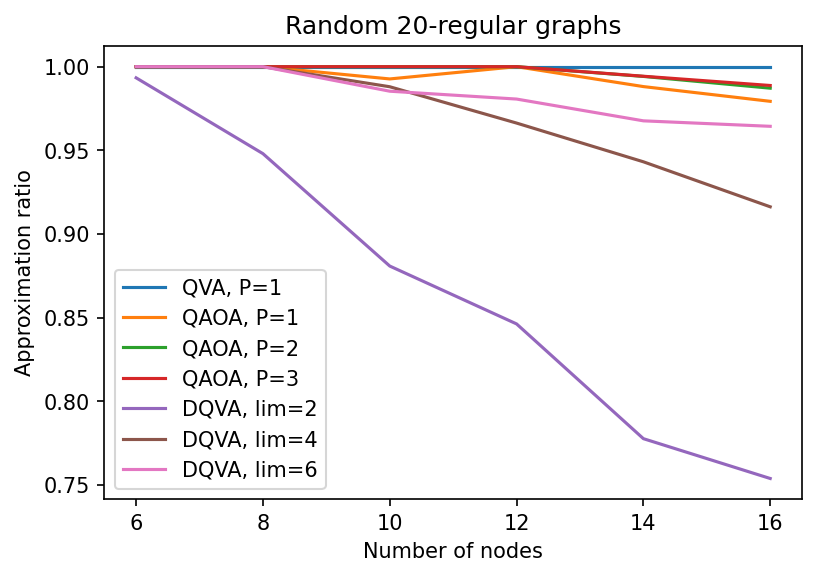

In [31]:
fig, ax = plt.subplots(dpi=150)

for sizes, approxs, label in data:
    ax.plot(sizes, approxs, label=label)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs'.format(d))
ax.legend()
plt.show()
plt.close()

In [32]:
mis_list = lists[0][1]
medians = [np.median(l) for l in mis_list]
print(medians)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[-0.2        -0.13333333 -0.06666667  0.          0.06666667  0.13333333
  0.2       ]
QVA, P=1
QAOA, P=1
QAOA, P=2
QAOA, P=3
DQVA, lim=2
DQVA, lim=4
DQVA, lim=6


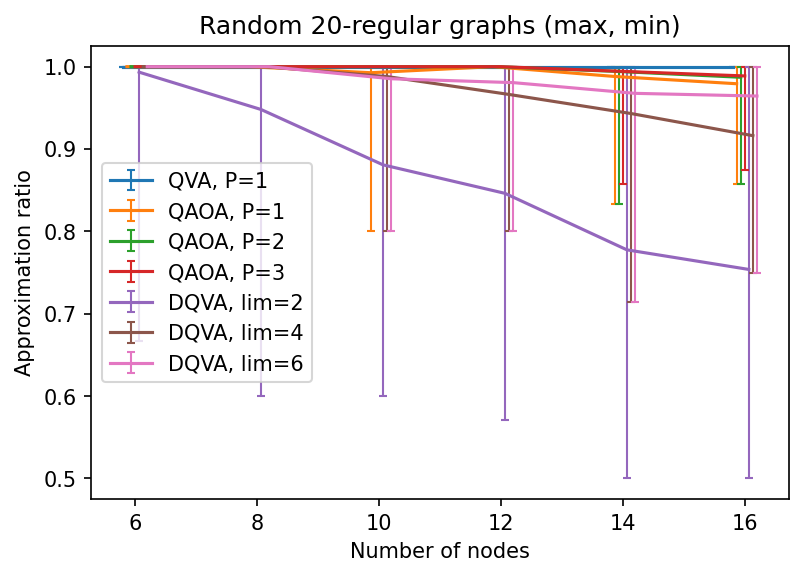

In [33]:
fig, ax = plt.subplots(dpi=150)

offset = np.linspace(-0.2, 0.2, len(lists))
print(offset)

for i, (sizes, mis_list, label) in enumerate(lists):
    print(label)
    sizes = np.array(sizes) + offset[i]
    vals = [np.mean(l) for l in mis_list]
    upper_err = [abs(np.max(l) - z) for l, z in zip(mis_list, vals)]
    lower_err = [abs(np.min(l) - z) for l, z in zip(mis_list, vals)]
    #print(vals)
    #print(upper_err)
    #print(lower_err)
    ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs (max, min)'.format(d))
ax.legend()
plt.show()
plt.close()

[-0.2        -0.13333333 -0.06666667  0.          0.06666667  0.13333333
  0.2       ]
QVA, P=1
QAOA, P=1
QAOA, P=2
QAOA, P=3
DQVA, lim=2
DQVA, lim=4
DQVA, lim=6


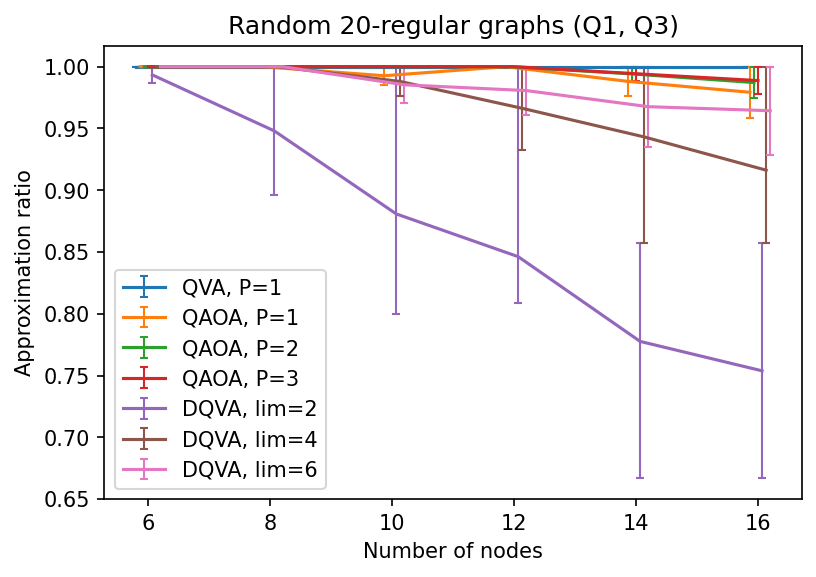

In [34]:
fig, ax = plt.subplots(dpi=150)

offset = np.linspace(-0.2, 0.2, len(lists))
print(offset)

for i, (sizes, mis_list, label) in enumerate(lists):
    print(label)
    sizes = np.array(sizes) + offset[i]
    vals = [np.mean(l) for l in mis_list]
    upper_err = [abs(np.quantile(l, 0.75) - z) for l, z in zip(mis_list, vals)]
    lower_err = [abs(np.quantile(l, 0.25) - z) for l, z in zip(mis_list, vals)]
    #print(vals)
    #print(upper_err)
    #print(lower_err)
    ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs (Q1, Q3)'.format(d))
ax.legend()
plt.show()
plt.close()

# Does DQVA improve in later rounds?

In [44]:
def get_pickles(alg, P, sim, n, d, lim=None):
    
    retval = []
    
    base_path = 'benchmark_results/{}_P{}_{}/'.format(alg, P, sim)
    if d < 10:
        graph_paths = 'N*_d{}_graphs/'.format(d)
    else:
        graph_paths = 'N*_p{}_graphs/'.format(d)
    
    graph_dirs = glob.glob(base_path + graph_paths)
    graph_dirs = sorted(graph_dirs, key=lambda fn: int(fn.split('/')[-2].split('_')[0].strip('N')))
    
    for gd in graph_dirs:
        #print(gd)
        all_graphs = glob.glob(gd+'*')
        temp_mis_approx = []
        for graph in all_graphs:
            #print('\t', graph)
            graphfn = 'benchmark_graphs/' + '/'.join(graph.split('/')[-2:]) + '.txt'
            G = graph_from_file(graphfn)
            
            temp_name = graph.split('/')[-2:]
            graph_name = temp_name[0].strip('graphs') + temp_name[1]
            
            opt = brute_force_search(G)[1]
            #print('\t Opt =', opt)
            if alg == 'dqva' and d > 10:
                if lim is None:
                    raise Exception('Must specify lim parameter with alg=dqva')
                reps = glob.glob(graph+'/*_lim{}_*'.format(lim))
            else:
                reps = glob.glob(graph+'/*')
            temp_pickles = []
            for pklfile in reps:
                #print('\t\t', pklfile)
                with open(pklfile, 'rb') as pf:
                    res = pickle.load(pf)
                    #print('\t'*3, res['graph'])
                    #print('\t'*3, res['out'][0])
                    temp_pickles.append(res['out'])
        
            # after collecting reps for this graph, store the results
            retval.append((G, opt, temp_pickles, graph_name))
            
    return retval

In [53]:
def plot_dqva_approxs(data, savedir=None, show=True, verbose=0):
    
    G, opt, outs, graph_name = data
    print(graph_name)
    print('Opt =', opt)
    
    fig, ax = plt.subplots(dpi=150)

    for r, out in enumerate(outs):
        best_mis, best_params, best_init, best_mixer, history = out
        if verbose > 0:
            print('\nRep', r + 1)
            print(best_mis, best_init, best_mixer, len(history))
        num_mixer_rounds = len(history)
        x_vals, y_vals = [], []
        for i, mixer_round in enumerate(history):
            num_inner_rounds = len(mixer_round)

            for j, inner_round in enumerate(mixer_round):
                x_vals.append(i+1 + j/(num_inner_rounds+1))
                y_vals.append(abs(inner_round['cost'] / opt))
                if verbose > 0:
                    print('\t Mixer={}, Inner={}'.format(i+1, j+1))
                    print('\t', inner_round)

        ax.plot(x_vals, y_vals, c='b', alpha=0.2)
        ax.scatter(x_vals, y_vals, c='b', alpha=0.2, s=20)

    for i in range(1, num_mixer_rounds+1):
        ax.axvline(x=i, c='k', ls='--', alpha=0.3)

    ax.set_title('DQVA MIS approximations for Graph {}'.format(graph_name))
    ax.set_ylabel('Approximation Ratio')
    ax.set_xlabel('Mixer & Inner Rounds')
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + graph_name + '.png')
        
    if show:
        plt.show()
    plt.close()

In [55]:
dqva_N6_p20_data = get_pickles('dqva', 1, 'qasm', 6, 20, lim=2)
g1_data = dqva_N6_p20_data[0]

N6_p20_G31
Opt = 4


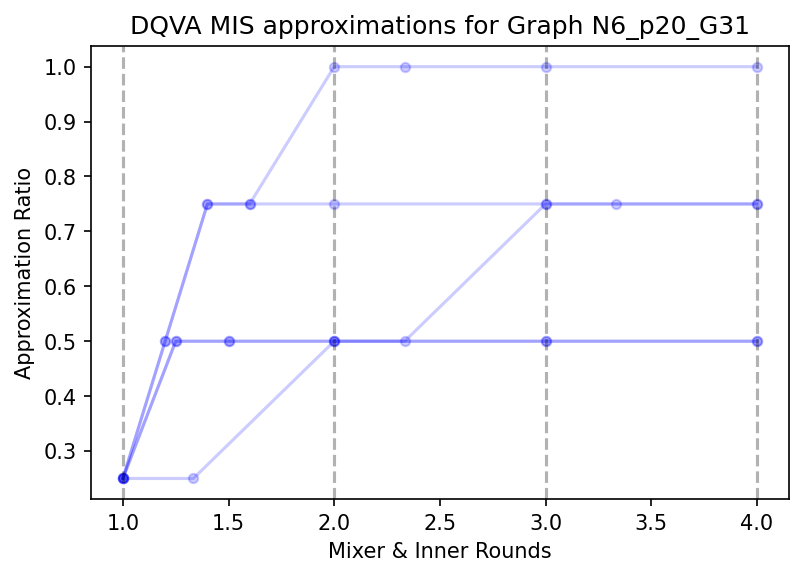

In [54]:
plot_dqva_approxs(g1_data, verbose=0)

In [56]:
# Plot and save all of the dqva results
for N in [6, 8, 10, 12, 14, 16]:
    for d in [20, 30, 50, 80]:
        for lim in [2, 4, 6]:
            dqva_data = get_pickles('dqva', 1, 'qasm', N, d, lim=lim)
            for data in dqva_data:
                plot_dqva_approxs(data, savedir='figures/dqva_approximations/lim{}/'.format(lim), show=False)

N6_p20_G31
Opt = 4
N6_p20_G36
Opt = 3
N6_p20_G38
Opt = 4
N6_p20_G6
Opt = 3
N6_p20_G1
Opt = 3
N6_p20_G8
Opt = 3
N6_p20_G39
Opt = 3
N6_p20_G37
Opt = 3
N6_p20_G30
Opt = 3
N6_p20_G9
Opt = 3
N6_p20_G7
Opt = 3
N6_p20_G48
Opt = 3
N6_p20_G41
Opt = 3
N6_p20_G46
Opt = 3
N6_p20_G12
Opt = 3
N6_p20_G15
Opt = 3
N6_p20_G23
Opt = 3
N6_p20_G24
Opt = 3
N6_p20_G47
Opt = 3
N6_p20_G40
Opt = 3
N6_p20_G49
Opt = 4
N6_p20_G25
Opt = 3
N6_p20_G22
Opt = 3
N6_p20_G14
Opt = 3
N6_p20_G13
Opt = 4
N6_p20_G2
Opt = 3
N6_p20_G50
Opt = 3
N6_p20_G5
Opt = 3
N6_p20_G35
Opt = 4
N6_p20_G32
Opt = 3
N6_p20_G4
Opt = 4
N6_p20_G3
Opt = 3
N6_p20_G33
Opt = 4
N6_p20_G34
Opt = 3
N6_p20_G16
Opt = 4
N6_p20_G29
Opt = 3
N6_p20_G11
Opt = 3
N6_p20_G27
Opt = 3
N6_p20_G18
Opt = 4
N6_p20_G20
Opt = 3
N6_p20_G45
Opt = 3
N6_p20_G42
Opt = 3
N6_p20_G21
Opt = 4
N6_p20_G26
Opt = 4
N6_p20_G19
Opt = 4
N6_p20_G10
Opt = 3
N6_p20_G17
Opt = 3
N6_p20_G28
Opt = 3
N6_p20_G43
Opt = 3
N6_p20_G44
Opt = 4
N8_p20_G31
Opt = 4
N8_p20_G36
Opt = 4
N8_p20_G38
Opt = 4
N8

KeyboardInterrupt: 

<Figure size 900x600 with 0 Axes>

benchmark_results/dqva_P1_qasm/N8_d4_graphs/
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G1
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G12
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G15
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G14
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G13
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G100
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G16
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G11
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G18
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G19
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G10
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G17
N8_d4_G1


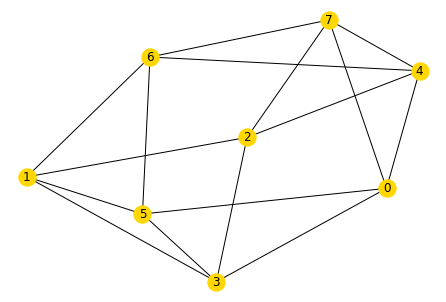

In [165]:
dqva_N8_d4_data = get_pickles('dqva', 1, 'qasm', 8, 4)
g1_data = dqva_N8_d4_data[0]
G, opt, outs, graph_name = g1_data
print(graph_name)
nx.draw_spring(G, with_labels=True, node_color='gold')

N8_d4_G1
Opt = 3

Rep 1
10000010 00000000 [1, 4, 7, 6, 5, 3, 2, 0] 4
	 Mixer=1, Inner=1
	 {'mixer_round': 1, 'inner_round': 1, 'cost': -1.9991455078125, 'init_state': '00000000', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=1, Inner=2
	 {'mixer_round': 1, 'inner_round': 2, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=2, Inner=1
	 {'mixer_round': 2, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=3, Inner=1
	 {'mixer_round': 3, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=4, Inner=1
	 {'mixer_round': 4, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}

Rep 2
10100000 00000000 [7, 5, 0, 3, 4, 2, 1, 6] 4
	 Mixer=1, Inner=1
	 {'mixer_round': 1, 'inner_round': 1, 'cost': -2.0, 'init_state': '00000000', 'mixer_order': [7, 5, 0, 3, 4, 2, 1, 6]}
	 Mixer=1, Inner=2
	 {'mixer_roun

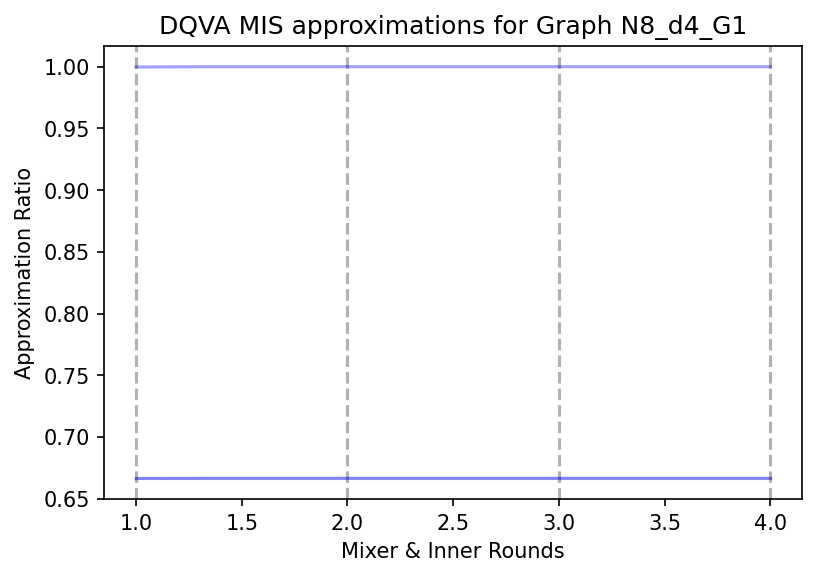

In [166]:
plot_dqva_approxs(g1_data, verbose=1)